In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Plot style settings
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
# For reproducibility
np.random.seed(42)

In [75]:
m = 1
b = 1

x = np.arange(0, 10)
yhat = m * x + b 
y = yhat + 2*np.random.randn(len(x)) # Introduce some "noise" into the data


In [102]:
def plot_model_and_residuals(x, obs, model):
    residuals = obs - model

    fig, axs = plt.subplots(2, 1, sharex=True, height_ratios=[0.7, 0.3], figsize=(6,8))

    axs[0].set_title('Data')
    axs[0].set_ylabel('Y')
    axs[0].set_ylim(-1 , max(obs)* 1.4)
    axs[0].plot(x, model, '--k', label='Model')
    axs[0].vlines(x, model, obs, color='palevioletred', lw=4)
    axs[0].plot(x, obs, 'o', label='Observations', ms=15)
    axs[0].legend(loc=2)
    
    axs[1].set_title('Residuals')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel(r'$\epsilon$', fontsize=16)
    ymax = max(abs(obs))
    axs[1].set_ylim(-1.2 * ymax, 1.2 * ymax)
    axs[1].vlines(x, np.zeros(len(x)), residuals, color='palevioletred', lw=2)
    axs[1].plot(x, residuals, 'o', color='palevioletred', ms=10, markerfacecolor='white', mew=3)
    axs[1].plot(np.zeros(len(x)), '--k')


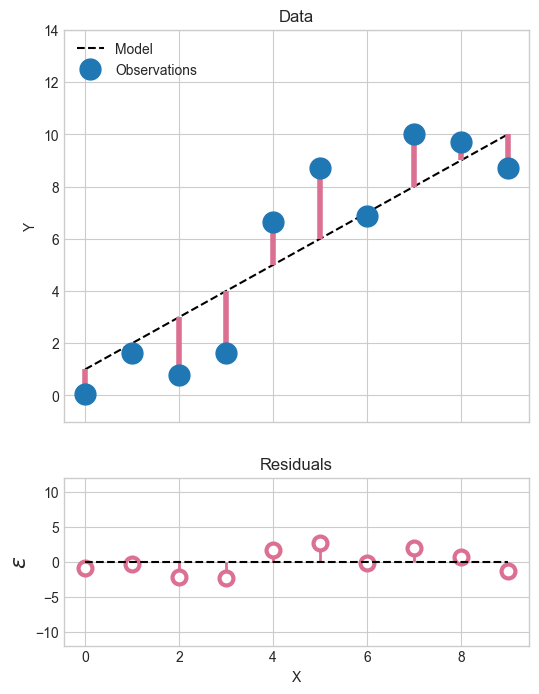

In [103]:
plot_model_and_residuals(x, y, yhat)

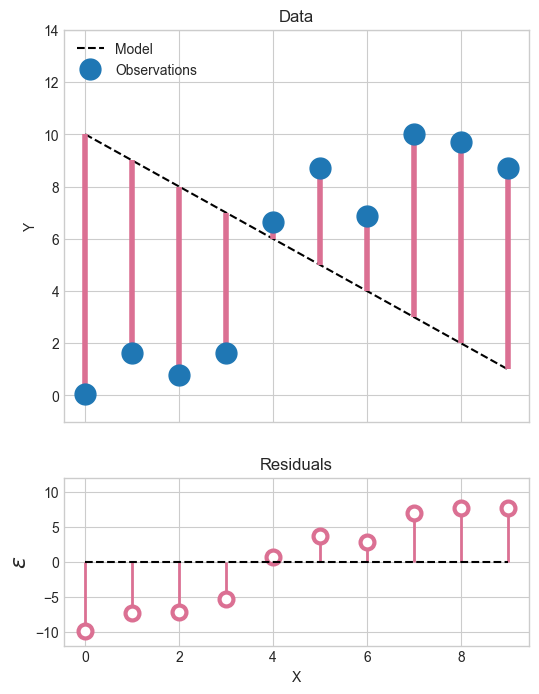

In [104]:
bad_yhat = 10 - x
plot_model_and_residuals(x, y, bad_yhat)

In [110]:
print(sum(y-yhat))
print(sum(y-bad_yhat))

-0.301139829753172
-0.30113982975317555


In [111]:
print(sum(abs(y - yhat)))
print(sum(abs(y - bad_yhat)))

14.436878925371886
59.56835942063006


In [108]:
print(sum((y - yhat)**2))
print(sum((y - bad_yhat)**2))

27.911094569378506
425.12388830661666


In [186]:
y_poison = y + 10
yhat_poison = yhat + 10
yhat_poison_with_buffer = yhat_poison - 4

In [169]:
x_other_meals = np.random.randint(0,10,20)
y_other_meals = np.random.randint(0,10,20) + m * x_other_meals + b + 3*np.random.randn(len(x_other_meals))

Text(0, 0.5, 'Poison Risk')

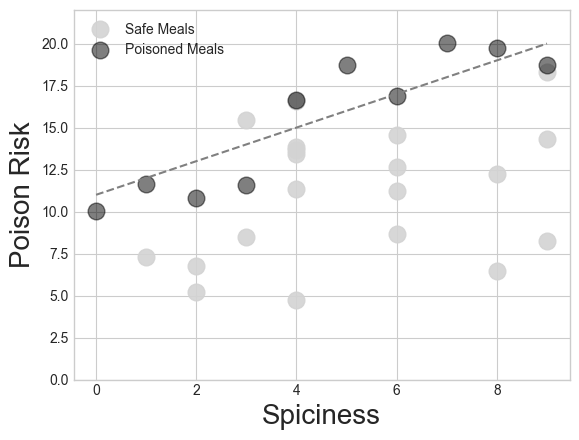

In [191]:
plt.plot(x_other_meals, y_other_meals,'o', color='lightgrey', label='Safe Meals', ms=12, alpha=0.9)
plt.plot(x, y_poison,'ok', label='Poisoned Meals', ms=12, alpha=0.5)
plt.plot(x, yhat_poison, '--', color='grey')

plt.legend()
plt.ylim(0, 22)
plt.xlabel('Spiciness', fontsize=20)
plt.ylabel('Poison Risk', fontsize=20)

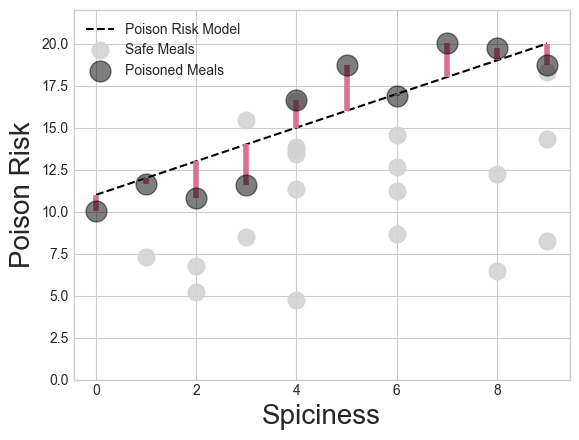

In [181]:
residuals = y_poison - yhat_poison

fig, axs = plt.subplots(1, 1)
axs.set_ylabel('Poison Risk', fontsize=20)
axs.set_xlabel('Spiciness', fontsize=20)
plt.ylim(0, 22)
axs.plot(x, yhat_poison, '--k', label='Poison Risk Model')
axs.plot(x_other_meals, y_other_meals,'o', color='lightgrey', label='Safe Meals', ms=12, alpha=0.9)
axs.vlines(x, yhat_poison, y_poison, color='palevioletred', lw=4)
axs.plot(x, y_poison, 'ok', label='Poisoned Meals', ms=15, alpha=0.5)
axs.legend(loc=2)



185.50197593135314


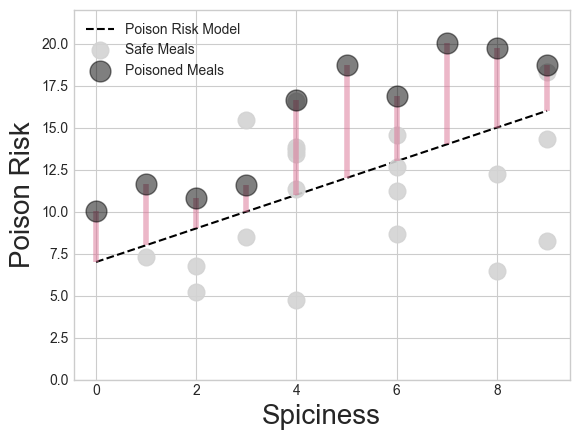

In [187]:
residuals_with_buffer = y_poison - yhat_poison_with_buffer
print(sum(residuals_with_buffer**2))

fig, axs = plt.subplots(1, 1)
axs.set_ylabel('Poison Risk', fontsize=20)
axs.set_xlabel('Spiciness', fontsize=20)
plt.ylim(0, 22)
axs.plot(x, yhat_poison_with_buffer, '--k', label='Poison Risk Model')
axs.plot(x_other_meals, y_other_meals,'o', color='lightgrey', label='Safe Meals', ms=12, alpha=0.9)
axs.vlines(x, yhat_poison_with_buffer, y_poison, color='palevioletred', lw=4, alpha=0.5)
axs.plot(x, y_poison, 'ok', label='Poisoned Meals', ms=15, alpha=0.5)
axs.legend(loc=2)

# ------- Scratchwork --------

**Assumptions:**
+ 3 meals/day
+ 30 days/month
+ 365 days/year
+ Natural lifespan of 70 years
+ A human can survive:
    + One week without food AND water
    + Three months without food (but with water)


In [90]:
# Cumulative number of lifetime meals:
total_meals = 70 * 365 * 3

# If the King has a safe water source, he can last 3 months without eating.
starve_horizon = 3 * 3 * 30

# A very unpopular ruler might endure 100 poisoning attempts over the course of their life, maybe?
total_poisonings = 10

In [91]:
meals = np.arange(total_meals)
starve_prob = np.array([min(1, x/starve_horizon) for x in meals])
poison_prob = np.array([min(1, x * total_poisonings / total_meals) for x in meals])

Text(0, 0.5, 'Cumulative Risk')

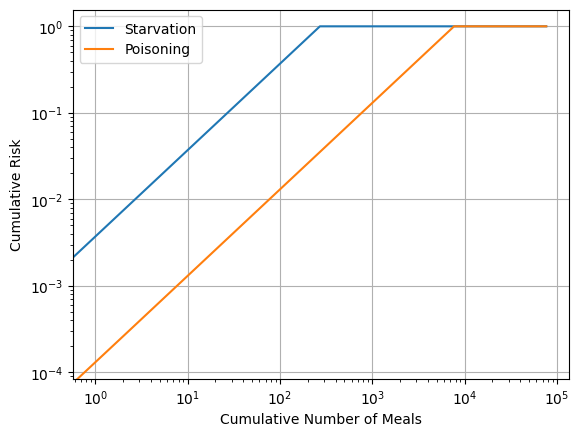

In [92]:
plt.plot(meals, starve_prob, label="Starvation")
plt.plot(meals, poison_prob, label="Poisoning")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.xlabel('Cumulative Number of Meals')
plt.ylabel('Cumulative Risk')

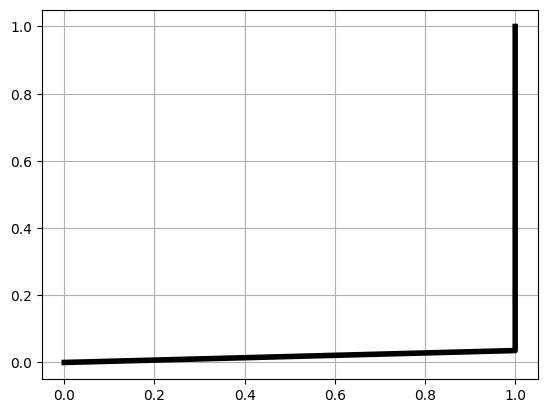

In [93]:
plt.plot(starve_prob, poison_prob, 'k', lw=4)
plt.grid(True)